<a href="https://colab.research.google.com/github/MarinaOhm/master_thesis/blob/main/RICE_CLUSTERING_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Master thesis
## *Exploratory Data Analysis for Forecasting*
*Developed by Max Hedeman Gueniau, Niklas Madsen, and Marina Ohm*

# Importing libraries

In [ ]:
# Libraries used for data wrangling and visualizations 
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.graph_objects as go
from datetime import datetime
from prettytable import PrettyTable
from plotly.subplots import make_subplots

# Import adfuller

# Load and transform data

In [ ]:
# Load data 

#C5 
C5=pd.read_csv('/content/drive/MyDrive/C5_Clustering (1).csv', sep=';')

#Navision 
Navision=pd.read_csv('/content/drive/MyDrive/Navision_Clustering (1).csv', sep=';')

#Currency and Number to convert 
currency=pd.read_csv('/content/drive/MyDrive/currency and number for clustering.csv', sep=';')


<ipython-input-2-8678620dde5f>:4: DtypeWarning: Columns (5,11) have mixed types. Specify dtype option on import or set low_memory=False.
  C5=pd.read_csv('/content/drive/MyDrive/C5_Clustering (1).csv', sep=';')
<ipython-input-2-8678620dde5f>:10: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  currency=pd.read_csv('/content/drive/MyDrive/currency and number for clustering.csv', sep=';')


In [ ]:
C5.shape


(408255, 17)

In [ ]:
Navision.shape

(237510, 18)

In [ ]:
inventory_navision=Navision[Navision["Source Code"]=="KØB"]

In [ ]:
boolean = C5.duplicated().any()
boolean

True

In [ ]:
duplicated=C5[C5.duplicated()]

In [ ]:
currency_=currency[["NUMBER_","CURRENCY"]]

,NUMBER_,CURRENCY
0,10010,DKK
1,10012,DKK
2,10014,DKK
3,10015,DKK
4,10016,DKK
...,...,...
222672,184630S,DKK
222673,184696S,GBP
222674,184713S,EUR
222675,184739S,SEK


In [ ]:
# Perform a left join on the "Number_" column
result = C5.merge(currency_, on='NUMBER_', how='left')

,_ItemNumber,date_,Q,sales,_description,NUMBER_,_No,Country_Region of Origin Code,Net Weight,Reorder Quantity,Unit Cost,NUMBER_.1,customer_id,First Purch Order Quantum,BDLRI Sales Status,Source Type,Source Code,CURRENCY
0,BSRAT-30N,2014-12-19 00:00:00.000,2.0,498.0,Small Square Basket with Leather,10064,BSRAT-30N,MG,1.35,0.0,36.24254,10064.0,100382.0,50.0,FFFF,NaN,NaN,DKK
1,BSRAT-30N,2014-12-22 00:00:00.000,-2.0,-498.0,Small Square Basket with Leather,10068,BSRAT-30N,MG,1.35,0.0,36.24254,10068.0,100382.0,50.0,FFFF,NaN,NaN,DKK
2,MELCU-LMAGT,2015-01-12 00:00:00.000,-1.0,-59.0,Melamine Two Tone Tall Cup,10070,MELCU-LMAGT,TH,0.18,0.0,10.32621,10070.0,100321.0,768.0,FFFF,NaN,NaN,DKK
3,HSGLC-SWW,2015-01-19 00:00:00.000,1.0,45.0,Swirly Embossed Tumbler Acrylic,10072,HSGLC-SWW,TW,0.13,0.0,6.12493,10072.0,100462.0,1600.0,FFFF,NaN,NaN,DKK
4,MELCU-LMAGT,2015-01-19 00:00:00.000,1.0,59.0,Melamine Two Tone Tall Cup,10072,MELCU-LMAGT,TH,0.18,0.0,10.32621,10072.0,100462.0,768.0,FFFF,NaN,NaN,DKK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123333,MELCU-STAR14,2016-10-27 00:00:00.000,12.0,27.6,Medium Melamine Cup Two Tone,184596S,MELCU-STAR14,TH,0.10,0.0,7.45912,184596S,5769.0,1152.0,FFFF,NaN,NaN,EUR
1123334,MELCU-B,2016-10-31 00:00:00.000,12.0,13.2,Solid Colored Medium Melamine Cup,184696S,MELCU-B,TH,0.10,0.0,4.28106,184696S,16074.0,1152.0,FFFF,NaN,NaN,GBP
1123335,MELCU-STAR14,2016-11-01 00:00:00.000,12.0,27.6,Medium Melamine Cup Two Tone,184713S,MELCU-STAR14,TH,0.10,0.0,7.45912,184713S,14705.0,1152.0,FFFF,NaN,NaN,EUR
1123336,CAROD3-GOLD,2016-11-01 00:00:00.000,24.0,110.4,3 Tier DIY Cake Stand Rod in,184713S,CAROD3-GOLD,CN,0.08,0.0,14.83000,184713S,14705.0,2000.0,FFFF,NaN,NaN,EUR


In [ ]:
result.drop_duplicates(inplace=True)

,_ItemNumber,date_,Q,sales,_description,NUMBER_,_No,Country_Region of Origin Code,Net Weight,Reorder Quantity,Unit Cost,NUMBER_.1,customer_id,First Purch Order Quantum,BDLRI Sales Status,Source Type,Source Code,CURRENCY
0,BSRAT-30N,2014-12-19 00:00:00.000,2.0,498.0,Small Square Basket with Leather,10064,BSRAT-30N,MG,1.35,0.0,36.24254,10064.0,100382.0,50.0,FFFF,NaN,NaN,DKK
1,BSRAT-30N,2014-12-22 00:00:00.000,-2.0,-498.0,Small Square Basket with Leather,10068,BSRAT-30N,MG,1.35,0.0,36.24254,10068.0,100382.0,50.0,FFFF,NaN,NaN,DKK
2,MELCU-LMAGT,2015-01-12 00:00:00.000,-1.0,-59.0,Melamine Two Tone Tall Cup,10070,MELCU-LMAGT,TH,0.18,0.0,10.32621,10070.0,100321.0,768.0,FFFF,NaN,NaN,DKK
3,HSGLC-SWW,2015-01-19 00:00:00.000,1.0,45.0,Swirly Embossed Tumbler Acrylic,10072,HSGLC-SWW,TW,0.13,0.0,6.12493,10072.0,100462.0,1600.0,FFFF,NaN,NaN,DKK
4,MELCU-LMAGT,2015-01-19 00:00:00.000,1.0,59.0,Melamine Two Tone Tall Cup,10072,MELCU-LMAGT,TH,0.18,0.0,10.32621,10072.0,100462.0,768.0,FFFF,NaN,NaN,DKK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1123333,MELCU-STAR14,2016-10-27 00:00:00.000,12.0,27.6,Medium Melamine Cup Two Tone,184596S,MELCU-STAR14,TH,0.10,0.0,7.45912,184596S,5769.0,1152.0,FFFF,NaN,NaN,EUR
1123334,MELCU-B,2016-10-31 00:00:00.000,12.0,13.2,Solid Colored Medium Melamine Cup,184696S,MELCU-B,TH,0.10,0.0,4.28106,184696S,16074.0,1152.0,FFFF,NaN,NaN,GBP
1123335,MELCU-STAR14,2016-11-01 00:00:00.000,12.0,27.6,Medium Melamine Cup Two Tone,184713S,MELCU-STAR14,TH,0.10,0.0,7.45912,184713S,14705.0,1152.0,FFFF,NaN,NaN,EUR
1123336,CAROD3-GOLD,2016-11-01 00:00:00.000,24.0,110.4,3 Tier DIY Cake Stand Rod in,184713S,CAROD3-GOLD,CN,0.08,0.0,14.83000,184713S,14705.0,2000.0,FFFF,NaN,NaN,EUR


In [ ]:
result.CURRENCY.unique()

array(['DKK', 'EUR', nan, 'USD', 'SEK', 'GBP', 'NOK'], dtype=object)

In [ ]:
conversions= {'SEK': 0.66, 
              'EUR': 7.45,
              'NOK': 0.68,
                'USD': 7.0,
                'GBP': 8.35,
                'DKK': 1.00,
              }

In [ ]:
result['rate'] = result['CURRENCY'].map(conversions) 
result['value'] = result['rate'] * result['sales']

In [ ]:
Navision["rate"]=1
Navision["value"]=Navision['rate'] * Navision["sales"]

In [ ]:
transformed_full_df = result.append(Navision, ignore_index=True)
transformed_full_df.shape 

<ipython-input-15-d5c217e14f18>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  transformed_full_df = result.append(Navision, ignore_index=True)


(456152, 21)

In [ ]:
# Extracting sales data 
sales_data=transformed_full_df.copy()
sales_data=sales_data[sales_data["Source Type"]!=2]
sales_data=sales_data[sales_data["Source Type"]!=0]
sales_data=sales_data[sales_data["Q"]!=0]

In [ ]:
print(Navision.shape)
print(C5.shape)

(237510, 20)
(408255, 17)


In [ ]:
transformed_full_df.head()

,_ItemNumber,date_,Q,sales,_description,NUMBER_,_No,Country_Region of Origin Code,Net Weight,Reorder Quantity,...,NUMBER_.1,customer_id,First Purch Order Quantum,BDLRI Sales Status,Source Type,Source Code,CURRENCY,rate,value,NUMBER
0,BSRAT-30N,2014-12-19 00:00:00.000,2.0,498.0,Small Square Basket with Leather,10064,BSRAT-30N,MG,1.35,0.0,...,10064.0,100382.0,50.0,FFFF,NaN,NaN,DKK,1.0,498.0,NaN
1,BSRAT-30N,2014-12-22 00:00:00.000,-2.0,-498.0,Small Square Basket with Leather,10068,BSRAT-30N,MG,1.35,0.0,...,10068.0,100382.0,50.0,FFFF,NaN,NaN,DKK,1.0,-498.0,NaN
2,MELCU-LMAGT,2015-01-12 00:00:00.000,-1.0,-59.0,Melamine Two Tone Tall Cup,10070,MELCU-LMAGT,TH,0.18,0.0,...,10070.0,100321.0,768.0,FFFF,NaN,NaN,DKK,1.0,-59.0,NaN
3,HSGLC-SWW,2015-01-19 00:00:00.000,1.0,45.0,Swirly Embossed Tumbler Acrylic,10072,HSGLC-SWW,TW,0.13,0.0,...,10072.0,100462.0,1600.0,FFFF,NaN,NaN,DKK,1.0,45.0,NaN
4,MELCU-LMAGT,2015-01-19 00:00:00.000,1.0,59.0,Melamine Two Tone Tall Cup,10072,MELCU-LMAGT,TH,0.18,0.0,...,10072.0,100462.0,768.0,FFFF,NaN,NaN,DKK,1.0,59.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456147,MKTBG-SMAGIC21,2023-03-28 00:00:00.000,50.0,0.0,Paper Bag with Heart Print - Pink - Small,NaN,MKTBG-SMAGIC21,DK,0.06,0.0,...,NaN,5661,21200.0,FFFF,1.0,SALG,NaN,1.0,0.0,NaN
456148,CDTWI-HS211XC,2023-03-28 00:00:00.000,0.0,0.0,Twisted Two Tone Candles in 3 Asst. Colors,NaN,CDTWI-HS211XC,CN,0.04,8640.0,...,NaN,5661,12096.0,FFFF,1.0,LAGERREGL.,NaN,1.0,0.0,NaN
456149,FLPOT-SPI,2023-03-28 00:00:00.000,0.0,0.0,Ceramic Flower Pots in Perfect Pink - Small,NaN,FLPOT-SPI,PT,2.90,250.0,...,NaN,5661,250.0,FFFF,1.0,LAGERREGL.,NaN,1.0,0.0,NaN
456150,MELCU-DADE,2023-03-28 00:00:00.000,0.0,0.0,Melamine Cup with Daisy Dearest Print - Two To...,NaN,MELCU-DADE,TH,0.11,8064.0,...,NaN,5661,1152.0,FFFF,1.0,LAGERREGL.,NaN,1.0,0.0,NaN


In [ ]:
transformed_full_df=transformed_full_df.drop(['sales', 'NUMBER','NUMBER_'], axis=1)

In [ ]:
transformed_full_df=transformed_full_df.reset_index()

In [ ]:
sales_data = sales_data.reset_index()
# Convert the 'date_' column to datetime if it's not already
sales_data['date_'] = pd.to_datetime(sales_data['date_'])

#EDA before prepping clustering data

## Color palette

In [ ]:
color_palette = [
    'rgba(41, 57, 71, 1)',
    'rgba(128, 128, 128, 1)',
    'rgba(93, 112, 127, 1)',
    'rgba(242, 242, 242, 1)',
    'rgba(155, 170, 181, 1)',
    'rgba(80, 177, 200, 100)','rgba(154, 177, 197, 100)',
    'rgba(133, 173, 219, 100)','rgba(28, 59, 95, 100)',
    'rgba(40, 109, 125, 100)','rgba(23, 63, 73, 100)',
    'rgba(70, 115, 171, 100)'

]


In [ ]:
def assign_colors(unique_values, palette):
    color_mapping = {}
    num_colors = len(palette)

    for idx, value in enumerate(unique_values):
        color_mapping[value] = palette[idx % num_colors]

    return color_mapping


In [ ]:
df=sales_data.copy()
df=df[df["value"]!=0]

251

In [ ]:

# 1. Total number of unique customer_id
unique_customers = df['customer_id'].nunique()
print(f"Total number of unique customer_id: {unique_customers}")

# 2. Average sales value by customer_id by each year
df['date_'] = pd.to_datetime(df['date_'])
df['year'] = df['date_'].dt.year
average_sales = df.groupby(['customer_id', 'year'])['sales'].mean().reset_index()
print("\nAverage sales value by customer_id by each year:")
print(average_sales)

# 3. The distribution of country_region of origin code
item_count_by_country = df.groupby('Country_Region of Origin Code')['_ItemNumber'].nunique()
print("\nDistribution of Country_Region of Origin Code:")
print(item_count_by_country)

# 4. The total Q of customer_id with ranges
ranges = [0, 100, 500, 1000, 2000, float("inf")]
labels = ['0-100', '101-500', '501-1000', '1001-2000', 'above 2000']
customer_total_q = df.groupby('customer_id')['Q'].sum().reset_index()
customer_total_q['range'] = pd.cut(customer_total_q['Q'], bins=ranges, labels=labels, include_lowest=True)
total_customers_by_range = customer_total_q['range'].value_counts()

print("\nTotal Q of customer_id by ranges:")
print(total_customers_by_range)


Total number of unique customer_id: 18655

Average sales value by customer_id by each year:
            customer_id  year       sales
0                   4.0  2014    0.000000
1                   4.0  2015    0.000000
2                1012.0  2011  120.000000
3                1012.0  2016  192.000000
4                1018.0  2011   11.400000
...                 ...   ...         ...
32850        SE-SHOPIFY  2023  100.215323
32851        SI-SHOPIFY  2023  124.425000
32852        SK-SHOPIFY  2022  122.710000
32853        SK-SHOPIFY  2023  122.810000
32854  Æ-Ø12QWØ_""""""1  2022  303.517500

[32855 rows x 3 columns]

Distribution of Country_Region of Origin Code:
Country_Region of Origin Code
CN    55
DK    19
HK     1
IN     9
MG    23
PT    15
TH    98
TW     8
VN    23
Name: _ItemNumber, dtype: int64

Total Q of customer_id by ranges:
0-100         14611
101-500        2579
501-1000        711
1001-2000       443
above 2000      309
Name: range, dtype: int64


## Distribution of country region

In [ ]:

# 3. The distribution of country_region of origin code (as a bar plot)
item_count_by_country = item_count_by_country.sort_values(ascending=False)
fig = px.bar(x=item_count_by_country.index, y=item_count_by_country.values)

fig.update_traces(
    texttemplate='%{text:.2s}', text=item_count_by_country.values,
    textposition='outside',
    textfont=dict(size=14, color='black', family='Arial')
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Unique Item Count")
fig.update_layout(xaxis_title="Country")
fig.update_layout(title_text="Distribution of where each item are coming from", title_x=0.5)
fig.show()


## Distribution of how much each customer is buying for

In [ ]:
#
ranges = [0, 100, 500, 1000, 2000, float("inf")]
labels = ['0-100', '101-500', '501-1000', '1001-2000', 'above 2000']
customer_total_q = df.groupby('customer_id')['Q'].sum().reset_index()
customer_total_q['range'] = pd.cut(customer_total_q['Q'], bins=ranges, labels=labels, include_lowest=True)
total_customers_by_range = customer_total_q['range'].value_counts()

# Create a DataFrame from the total_customers_by_range_value Series
total_customers_by_range_df = total_customers_by_range.reset_index()
total_customers_by_range_df.columns = ['Range', 'Count']

# Assign colors 
unique_ranges = total_customers_by_range_df['Range'].unique()
range_color_mapping = assign_colors(unique_ranges, color_palette)

fig = px.bar(total_customers_by_range_df, x='Range', y='Count', color='Range', color_discrete_map=range_color_mapping)

fig.update_traces(
    texttemplate='%{y:,.0f}', text=total_customers_by_range.values,
    textposition='outside',
    textfont=dict(size=14, color='black', family='Arial')
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Count of customers")
fig.update_layout(xaxis_title="Range")
fig.update_layout(title_text="How many items are each unique customer buying?", title_x=0.5)
fig.show()

## Distribution of how much value each customer are buying for

In [ ]:
ranges = [0, 1000, 5000, 10000, 20000, float("inf")]
labels = ['0-1000', '1001-5000', '5001-10000', '10001-20000', 'above 20000']
customer_total_value = df.groupby('customer_id')['value'].sum().reset_index()
customer_total_value['range'] = pd.cut(customer_total_value['value'], bins=ranges, labels=labels, include_lowest=True)
total_customers_by_range_value = customer_total_value['range'].value_counts().sort_index()

# Create a DataFrame from the total_customers_by_range_value Series
total_customers_by_range_value_df = total_customers_by_range_value.reset_index()
total_customers_by_range_value_df.columns = ['Range', 'Count']

# Assign colors 
unique_ranges = total_customers_by_range_value_df['Range'].unique()
range_color_mapping = assign_colors(unique_ranges, color_palette)

# Plot
fig = px.bar(total_customers_by_range_value_df, x='Range', y='Count', color='Range', color_discrete_map=range_color_mapping)

fig.update_traces(
    texttemplate='%{y:,.0f}', text=total_customers_by_range_value_df.Count.values,
    textposition='outside',
    textfont=dict(size=14, color='black', family='Arial')
)

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Count of customers")
fig.update_layout(xaxis_title="Range")
fig.update_layout(title_text="Total value each unique customer are buying for", title_x=0.5)
fig.show()


In [ ]:
total_customers_by_range_value_df

,Range,Count
0,0-1000,13336
1,1001-5000,2588
2,5001-10000,1040
3,10001-20000,774
4,above 20000,889


## Evolution of total unique customers 

In [ ]:

# Extract year and month from the date_
df['year_month'] = df['date_'].dt.to_period('M')

# Group by year_month and count unique customers
total_customers_by_month = df.groupby('year_month')['customer_id'].nunique().reset_index()

# Plot
fig = go.Figure(go.Scatter(x=total_customers_by_month['year_month'].astype(str), 
                           y=total_customers_by_month['customer_id'],
                           mode='lines+markers',line=dict(color=color_palette[0]),  # Set the line color
                           marker=dict(color=color_palette[0])))  # Set the marker color))

fig.update_layout(title_text="Evolution of Total Unique Customers by Month", title_x=0.5)
fig.update_layout(yaxis_title="Total Unique Customers")
fig.update_layout(xaxis_title="Year-Month")
fig.update_xaxes(type='category', tickangle=-45)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.show()


## Boxplot of total value of each customer is buying for 

In [ ]:
# Group by customer_id and calculate the sum of 'value' for each customer
total_value_by_customer = df.groupby('customer_id')['value'].sum().reset_index()

# Plot
fig = px.box(total_value_by_customer, y='value')
fig.update_layout(title_text="Boxplot of Total Value Each Unique Customer is Buying For", title_x=0.5)
fig.update_layout(yaxis_title="Total Value")
fig.update_layout(xaxis_title="Customers")
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.show()


## Total value contribution

In [ ]:
# Define the customer segment ranges and labels
ranges = [0, 10000, 50000, 100000, 250000, float("inf")]
labels = ['Reseller', 'Bronze', 'Silver', 'Gold', 'Platinum']

# Calculate total sales for each unique customer per year
total_sales_by_customer_year = df.groupby(['customer_id', 'year'])['value'].sum().reset_index()

# Create the 'customer_segment' column based on the total yearly sales
total_sales_by_customer_year['customer_segment'] = pd.cut(total_sales_by_customer_year['value'], bins=ranges, labels=labels, include_lowest=True)

total_sales_by_customer_year=total_sales_by_customer_year[total_sales_by_customer_year["value"]>0]

# Calculate the total value contributed by each segment per year
segment_value_per_year = total_sales_by_customer_year.groupby(['year', 'customer_segment'])['value'].sum().reset_index()

# Calculate the total value per year
total_value_per_year = segment_value_per_year.groupby('year')['value'].sum().reset_index(name='total_value')

# Merge total value per year to segment_value_per_year and calculate the percentage
segment_value_per_year = segment_value_per_year.merge(total_value_per_year, on='year')
segment_value_per_year['percentage'] = (segment_value_per_year['value'] / segment_value_per_year['total_value']) * 100

# Plot the stacked bar chart as an index
fig = px.bar(segment_value_per_year, x='year', y='percentage', color='customer_segment', text='percentage')

fig.update_traces(texttemplate='%{text:.2s}%', textposition='inside', textfont=dict(size=7, color='white', family='Arial'))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Percentage of Total Value")
fig.update_layout(xaxis_title="Year")
# Customize x-axis tick values and format
fig.update_xaxes(
    tickmode='array',
    tickvals=segment_value_per_year['year'].unique(),
    tickformat='d'
)
fig.update_layout(title_text="Percentage of Total Value Contributed by Each Customer Segment per Year", title_x=0.5)
fig.show()


In [ ]:
# Filter the data to only include the desired years
segment_value_per_year = segment_value_per_year[segment_value_per_year['year'].isin([2020, 2021, 2022, 2023])]

# Assign colors 
unique_segments = segment_value_per_year['customer_segment'].unique()
segment_color_mapping = assign_colors(unique_segments, color_palette)

# Plot the stacked bar chart as an index
fig = px.bar(segment_value_per_year, x='year', y='percentage', color='customer_segment', text='percentage',color_discrete_map=segment_color_mapping)

fig.update_traces(texttemplate='%{text:.2s}%', textposition='inside', textfont=dict(size=12, family='Arial'))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Percentage of Total Value")
fig.update_layout(xaxis_title="Year")
# Customize x-axis tick values and format
fig.update_xaxes(
    tickmode='array',
    tickvals=segment_value_per_year['year'].unique(),
    tickformat='d'
)
fig.update_layout(title_text="Percentage of Total Value Contribution by Each Customer Segment per Year", title_x=0.5)

# Set x-axis type to category and move the legend to the bottom
fig.update_xaxes(type='category')
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=-0.1, xanchor='center', x=0.5),legend_title="")
fig.update_layout(height=1000, width=1200)

fig.show()


In [ ]:
# Extract the year from the date_ column
df['year'] = df['date_'].dt.year


# Calculate total sales for each country region code per year
total_sales_by_country_year = df.groupby(['Country_Region of Origin Code', 'year'])['value'].sum().reset_index()

# Assign colors 
unique_regions = total_sales_by_country_year['Country_Region of Origin Code'].unique()
region_color_mapping = assign_colors(unique_regions, color_palette)


# Calculate the total value per year
total_value_per_year = total_sales_by_country_year.groupby('year')['value'].sum().reset_index(name='total_value')

# Merge total value per year to total_sales_by_country_year and calculate the percentage
total_sales_by_country_year = total_sales_by_country_year.merge(total_value_per_year, on='year')
total_sales_by_country_year['percentage'] = (total_sales_by_country_year['value'] / total_sales_by_country_year['total_value']) * 100

# Filter the data to only include the desired years
total_sales_by_country_year = total_sales_by_country_year[total_sales_by_country_year['year'].isin([2020, 2021, 2022, 2023])]

# Plot the stacked bar chart as an index
fig = px.bar(total_sales_by_country_year, x='year', y='percentage', color='Country_Region of Origin Code', text='percentage',color_discrete_map=region_color_mapping)

fig.update_traces(texttemplate='%{text:.2s}%', textposition='inside', textfont=dict(size=12, family='Arial'))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Percentage of Total Value")
fig.update_layout(xaxis_title="Year")
# Customize x-axis tick values and format
fig.update_xaxes(
    tickmode='array',
    tickvals=total_sales_by_country_year['year'].unique(),
    tickformat='d'
)
fig.update_layout(title_text="Percentage of Total Value Contribution by each Country Region per Year", title_x=0.5)

# Set x-axis type to category and move the legend to the bottom
fig.update_xaxes(type='category')
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=-0.1, xanchor='center', x=0.5),legend_title="")
fig.update_layout(height=1000, width=1200)

fig.show()


## Average first order size

In [ ]:
# Group by year_month and count unique customers
average_first_order = df.groupby('year')['First Purch Order Quantum'].mean().reset_index()

# Plot
fig = go.Figure(go.Scatter(x=average_first_order['year'].astype(str), 
                           y=average_first_order['First Purch Order Quantum'],
                           mode='lines+markers',line=dict(color=color_palette[0]),  # Set the line color
                           marker=dict(color=color_palette[0])))  # Set the marker color))

fig.update_layout(title_text="Average first order size by year", title_x=0.5)
fig.update_layout(yaxis_title="First order quantity")
fig.update_layout(xaxis_title="Year")
fig.update_xaxes(type='category', tickangle=-45)
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')

fig.show()

### ABC analysis

In [ ]:
def ABC_analysis(df):
    grouped_df = (
            df.loc[:, ['customer_id','value']]
            .groupby('customer_id')
            .sum()         
        )

    grouped_df = grouped_df.sort_values(by=['value'], ascending=False)
    
    ## Ranking by importance
    grouped_df["Rank"] = grouped_df['value'].rank(ascending = False)
    grouped_df["Importance"] = ' '
    grouped_df = grouped_df.reset_index()

    ## Checking the Importance of the Customers and Categorising into class A,B,C and splitting based on 20-30-50
    grouped_df['Importance'][0: int(0.2 * grouped_df['Rank'].max())] = 'A'
    grouped_df['Importance'][int(0.2 * grouped_df['Rank'].max()) : int(0.5 * grouped_df['Rank'].max())] = 'B'
    grouped_df['Importance'][int(0.5 * grouped_df['Rank'].max()): ] = 'C'                  
    
    return grouped_df

In [ ]:
ABC_groups = ABC_analysis(df)
ABC_groups.head()

<ipython-input-96-00ba462d6f98>:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-00ba462d6f98>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-96-00ba462d6f98>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,customer_id,value,Rank,Importance
0,15468.0,1.175978e+06,1.0,A
1,20727.0,1.028128e+06,2.0,A
2,5885.0,9.930651e+05,3.0,A
3,18933.0,8.861933e+05,4.0,A
4,15468,7.342714e+05,5.0,A


C    9328
B    5596
A    3731
Name: Importance, dtype: int64

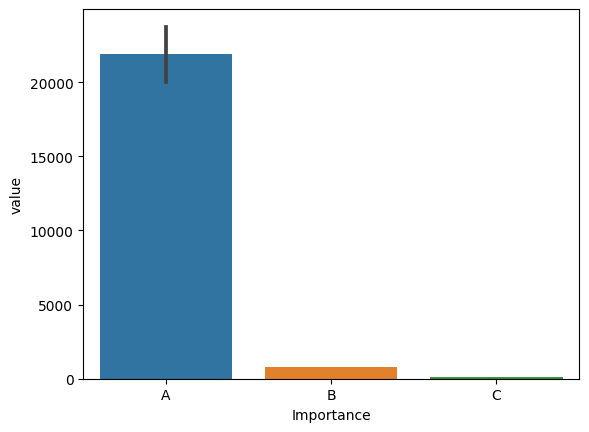

In [ ]:
sns.barplot(x = 'Importance', y = 'value',data = ABC_groups)
ABC_groups['Importance'].value_counts()

In [ ]:
ABC_groups.groupby('Importance')['value'].sum() / ABC_groups['value'].sum() * 100.

Importance
A    93.806651
B     5.144363
C     1.048987
Name: value, dtype: float64

## What are each SKU selling for? 

In [ ]:
# Define the ranges and labels
ranges = [0, 50000, 100000, 200000, 500000, float("inf")]
labels = ['0-50,000', '50,000-100,000', '100,000-200,000', '200,000-500,000', 'above 500,000']

# Calculate total sales for each _ItemNumber per year
total_sales_by_item_year = df.groupby(['_ItemNumber', 'year'])['value'].sum().reset_index()

# Create the 'range' column based on the defined ranges
total_sales_by_item_year['range'] = pd.cut(total_sales_by_item_year['value'], bins=ranges, labels=labels, include_lowest=True)

# Group the data by year and range, and calculate the total sales for each group
total_sales_by_range_year = total_sales_by_item_year.groupby(['year', 'range'])['value'].sum().reset_index()

# Calculate the total sales per year
total_value_per_year = total_sales_by_range_year.groupby('year')['value'].sum().reset_index(name='total_value')

#total_value_per_year = total_value_per_year[total_value_per_year['year'].isin([2020, 2021, 2022])]

# Merge total value per year to total_sales_by_range_year and calculate the percentage
total_sales_by_range_year = total_sales_by_range_year.merge(total_value_per_year, on='year')
total_sales_by_range_year['percentage'] = (total_sales_by_range_year['value'] / total_sales_by_range_year['total_value']) * 100

# Plot the stacked bar chart as an index
fig = px.bar(total_sales_by_range_year, x='year', y='percentage', color='range', text='percentage',color_discrete_map=custom_color_palette)

fig.update_traces(texttemplate='%{text:.2s}%', textposition='inside', textfont=dict(size=12, family='Arial'))
fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Percentage of Total Value")
fig.update_layout(xaxis_title="Year")
# Customize x-axis tick values and format
fig.update_xaxes(
    tickmode='array',
    tickvals=total_sales_by_range_year['year'].unique(),
    tickformat='d'
)
fig.update_layout(title_text="Total Value Contribution by each _ItemNumber Range per Year", title_x=0.5)

# Set x-axis type to category and move the legend to the bottom
fig.update_xaxes(type='category')
fig.update_layout(legend=dict(orientation='h', yanchor='bottom', y=-0.1, xanchor='center', x=0.5), legend_title="")
fig.update_layout(height=1000, width=1200)

fig.show()


In [ ]:
# Calculate total sales for each _ItemNumber per year
total_sales_by_item_year = df.groupby(['_ItemNumber', 'year'])['value'].sum().reset_index()

# Calculate the average yearly sales for each _ItemNumber
average_sales_by_item = total_sales_by_item_year.groupby('_ItemNumber')['value'].mean().reset_index()

# Plot the boxplot
fig = px.box(average_sales_by_item, y='value', hover_data=['_ItemNumber'])

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Average Yearly Sales")
fig.update_layout(xaxis_title="All Items")
fig.update_layout(title_text="Boxplot of Average Yearly Sales per Item Number", title_x=0.5)

fig.show()

# Feature engineering

In [ ]:
# Set the DataFrame index to the 'date_' column
sales_data.set_index('date_', inplace=True)

# Group by '_ItemNumber' and resample the data monthly
grouped = sales_data.groupby('_ItemNumber').resample('M')

# Calculate monthly sales, quantity, and customer_id
monthly_sum = grouped[['value', 'Q', 'customer_id']].sum()

# Reset the index
monthly_sum.reset_index(inplace=True)

# Calculate the sales growth rate
monthly_sum['monthly_sales_growth'] = monthly_sum.groupby('_ItemNumber')['value'].pct_change().replace([np.inf, -np.inf], np.nan).fillna(0)

# Calculate the average order size, sales value, and customer_id
daily_sum = sales_data.groupby(['_ItemNumber', sales_data.index.date, 'customer_id']).sum()
average_order_size = daily_sum.groupby('_ItemNumber')['Q'].mean()
average_value_by_order = daily_sum.groupby('_ItemNumber')['value'].mean()

# Calculate unique customers per item
unique_customers_per_item = sales_data.groupby('_ItemNumber')['customer_id'].nunique()

###------CLV-------#### 

customer_data = sales_data.groupby(['_ItemNumber', 'customer_id'])[['value']].sum().reset_index()
customer_data['order_count'] = sales_data.groupby(['_ItemNumber', 'customer_id']).size().values

customer_grouped = customer_data.groupby('_ItemNumber')
average_revenue_per_customer = customer_grouped['value'].mean()
average_orders_per_customer = customer_grouped['order_count'].mean()
average_revenue_per_order = average_revenue_per_customer / average_orders_per_customer

# Calculate the average purchase frequency
average_purchase_frequency = daily_sum.groupby(['_ItemNumber', 'customer_id'])['value'].count().groupby('_ItemNumber').mean()

# Calculate the average customer lifespan (in days)
#sales_data=sales_data.reset_index()
#average_customer_lifespan = sales_data.groupby('customer_id')['date_'].max() - sales_data.groupby('customer_id')['date_'].min()
#average_customer_lifespan = average_customer_lifespan.dt.days.mean()

# Calculate the average customer lifespan (in days) for each unique item number
sales_data = sales_data.reset_index()
customer_lifespan = sales_data.groupby(['_ItemNumber', 'customer_id'])['date_'].agg(['min', 'max'])
customer_lifespan['lifespan'] = (customer_lifespan['max'] - customer_lifespan['min']).dt.days
average_customer_lifespan_by_item = customer_lifespan.groupby('_ItemNumber')['lifespan'].mean()

CLV = average_revenue_per_order * average_purchase_frequency * average_customer_lifespan_by_item

#CLV = average_revenue_per_order * average_purchase_frequency * average_customer_lifespan

# Calculate the average days between sales
sales_data.set_index('date_', inplace=True)
sales_dates = sales_data[sales_data['Q'] > 0].groupby('_ItemNumber')['Q'].count()
total_days = (sales_data.index.max() - sales_data.index.min()).days
average_days_between_sales = total_days / sales_dates

# Group by '_ItemNumber' and calculate the average monthly sales and quantity
item_grouped = monthly_sum.groupby('_ItemNumber')
average_monthly_sales = item_grouped['value'].mean()
average_monthly_quantity = item_grouped['Q'].mean()

# Calculate sales variability for each item
def sales_variability(group):
    avg_demand = group['Q'].mean()
    squared_deviations = (group['Q'] - avg_demand) ** 2
    avg_squared_deviations = squared_deviations.mean()
    return np.sqrt(avg_squared_deviations)

sales_variability_by_item = monthly_sum.groupby('_ItemNumber').apply(sales_variability)

# Calculate the total sales and expense
total_sales = item_grouped['value'].sum()
total_expense = item_grouped['Q'].sum() * sales_data.groupby('_ItemNumber')['Unit Cost'].mean()

# Calculate the average monthly sales growth
average_monthly_sales_growth = item_grouped['monthly_sales_growth'].mean()

# Calculate the profit margin
profit_margin = (total_sales - total_expense) / total_sales * 100

# Create a new DataFrame with the desired columns
summary_df = pd.DataFrame({
    'average_monthly_sales': average_monthly_sales,
    'average_monthly_quantity': average_monthly_quantity,
    'profit_margin': profit_margin,
    'average_order_size': average_order_size,
    'average_days_between_sales': average_days_between_sales,
    'average_monthly_sales_growth': average_monthly_sales_growth,
    'sales_variability':sales_variability_by_item, 'average_value_by_order':average_value_by_order,
    'Customer_life_time':CLV, 'unique_customer_per_item':unique_customers_per_item
})

# Reset the index
summary_df.reset_index(inplace=True)

# Add the additional columns to the summary DataFrame
additional_columns = ['_description', 'Country_Region of Origin Code', 'Net Weight', 'Reorder Quantity',
                      'Unit Cost', 'First Purch Order Quantum', 'BDLRI Sales Status',
                      'Source Type', 'Source Code']
unique_items = sales_data.groupby('_ItemNumber')[additional_columns].first().reset_index()
result = summary_df.merge(unique_items, on='_ItemNumber', how='left')


In [ ]:
monthly_sum

,_ItemNumber,date_,value,Q,monthly_sales_growth
0,BGLEA-RVIL,2016-07-31,9059.80,129.0,0.000000
1,BGLEA-RVIL,2016-08-31,3145.00,66.0,-0.652862
2,BGLEA-RVIL,2016-09-30,7938.72,108.0,1.524235
3,BGLEA-RVIL,2016-10-31,6174.56,68.0,-0.222222
4,BGLEA-RVIL,2016-11-30,239.00,1.0,-0.961293
...,...,...,...,...,...
9743,WRBIR-SXC,2022-11-30,3762.87,507.0,0.177837
9744,WRBIR-SXC,2022-12-31,2329.60,303.0,-0.380898
9745,WRBIR-SXC,2023-01-31,6533.04,774.0,1.804361
9746,WRBIR-SXC,2023-02-28,7218.95,931.0,0.104991


In [ ]:
result

,_ItemNumber,average_monthly_sales,average_monthly_quantity,profit_margin,average_order_size,average_days_between_sales,average_monthly_sales_growth,sales_variability,average_value_by_order,Customer_life_time,unique_customer_per_item,_description,Country_Region of Origin Code,Net Weight,Reorder Quantity,Unit Cost,First Purch Order Quantum,BDLRI Sales Status,Source Type,Source Code
0,BGLEA-RVIL,7245.587975,63.814815,61.515523,4.448365,3.850862,0.554546,39.628245,505.071107,404149.926631,462,Large Check Fabric Covered Bag with,MG,0.45,0.0,43.69560,50.0,FFFF,1.0,SALG
1,BGLEA-RVIM,6261.091042,63.590361,62.782629,4.446504,3.753782,0.525482,39.846100,437.801648,434354.700682,429,Medium Check Fabric Covered Bag with,MG,0.35,0.0,36.64413,50.0,FFFF,1.0,SALG
2,BGLEA-VITL,9453.856176,81.495238,62.489078,5.375000,2.804143,1.580812,82.318675,623.526946,483280.286274,627,Fabric Covered Bag with Leather Handles,MG,0.45,0.0,43.51455,50.0,FFFF,1.0,SALG
3,BGLEA-VITM,7131.812205,70.380952,64.543290,5.040928,3.030529,1.254844,68.000333,510.805103,478115.806969,539,Fabric Covered Raffia with Leather,MG,0.35,0.0,35.92884,50.0,FFFF,1.0,SALG
4,BGPLA-EMBR,20133.407500,273.250000,78.290318,11.880435,48.554348,1.667989,251.729393,875.365543,374.381544,88,Recycled Plastic Shopping Bag with Embroidered...,IN,0.30,300.0,15.99597,300.0,FFFF,1.0,SALG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,THERMO-BIBI,14335.254861,137.878788,66.948460,6.354749,6.069293,-0.181017,129.014859,660.703087,45042.036725,491,Thermo with Gold Bird on Lid -,CN,0.88,2004.0,34.36368,2400.0,FFFF,1.0,SALG
279,THERMO-BIDMI,30422.169732,288.658537,65.917779,6.315368,2.359746,1.786395,138.617320,665.586424,92964.970870,1102,Thermo with Gold Bird on Lid - Dark,CN,0.88,0.0,35.91978,2400.0,FFFF,1.0,SALG
280,THERMO-BIP,18707.255556,174.111111,65.898692,5.935606,16.483395,0.026572,85.889392,637.747348,14705.580516,198,Thermo with Gold Bird on Lid - Lavender - 1 L.,CN,0.88,1200.0,36.63993,2400.0,FFFF,1.0,SALG
281,WATER-RICE,37.143000,207.525000,-1799.644617,80.202899,21.579710,-0.080708,224.111020,14.354783,49124.157004,29,"0,5 L Mineral",DK,0.30,1820.0,3.40000,0.0,FFFF,1.0,SALG


In [ ]:
result.columns

Index(['_ItemNumber', 'average_monthly_sales', 'average_monthly_quantity',
       'profit_margin', 'average_order_size', 'average_days_between_sales',
       'average_monthly_sales_growth', 'sales_variability',
       'average_value_by_order', 'Customer_life_time',
       'unique_customer_per_item', '_description',
       'Country_Region of Origin Code', 'Net Weight', 'Reorder Quantity',
       'Unit Cost', 'First Purch Order Quantum', 'BDLRI Sales Status',
       'Source Type', 'Source Code'],
      dtype='object')

In [ ]:
final_data=result.drop(['Source Type', 'Source Code'], axis=1)
#final_data.to_csv('final_updated_clustering_data.csv')

In [ ]:
# Removing Riceteria items
final_data=result[result["profit_margin"]>-10]

# EDA after prepping clustering data

In [ ]:
# Sort the pivot table in descending order
sorted_observations = final_data.sort_values(by='Customer_life_time', ascending=False).head(20)

# Plot customer life time by item number 
fig = px.bar(sorted_observations, x='_ItemNumber', y='Customer_life_time', title='The 20 best performing products based on Customer Life Time Value',
             color_discrete_sequence=[color_palette[8]])
#fig = px.bar(result, x="_ItemNumber",y='Customer_life_time', hover_data=['_ItemNumber'])

fig.update_layout(plot_bgcolor='rgba(0,0,0,0)')
fig.update_layout(yaxis_title="Customer Life Time Value")
fig.update_layout(xaxis_title="All Items")
fig.update_layout(title_text="The 20 best performing products based on Customer Life Time Value", title_x=0.5)

fig.show()

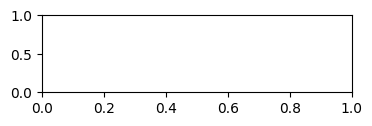

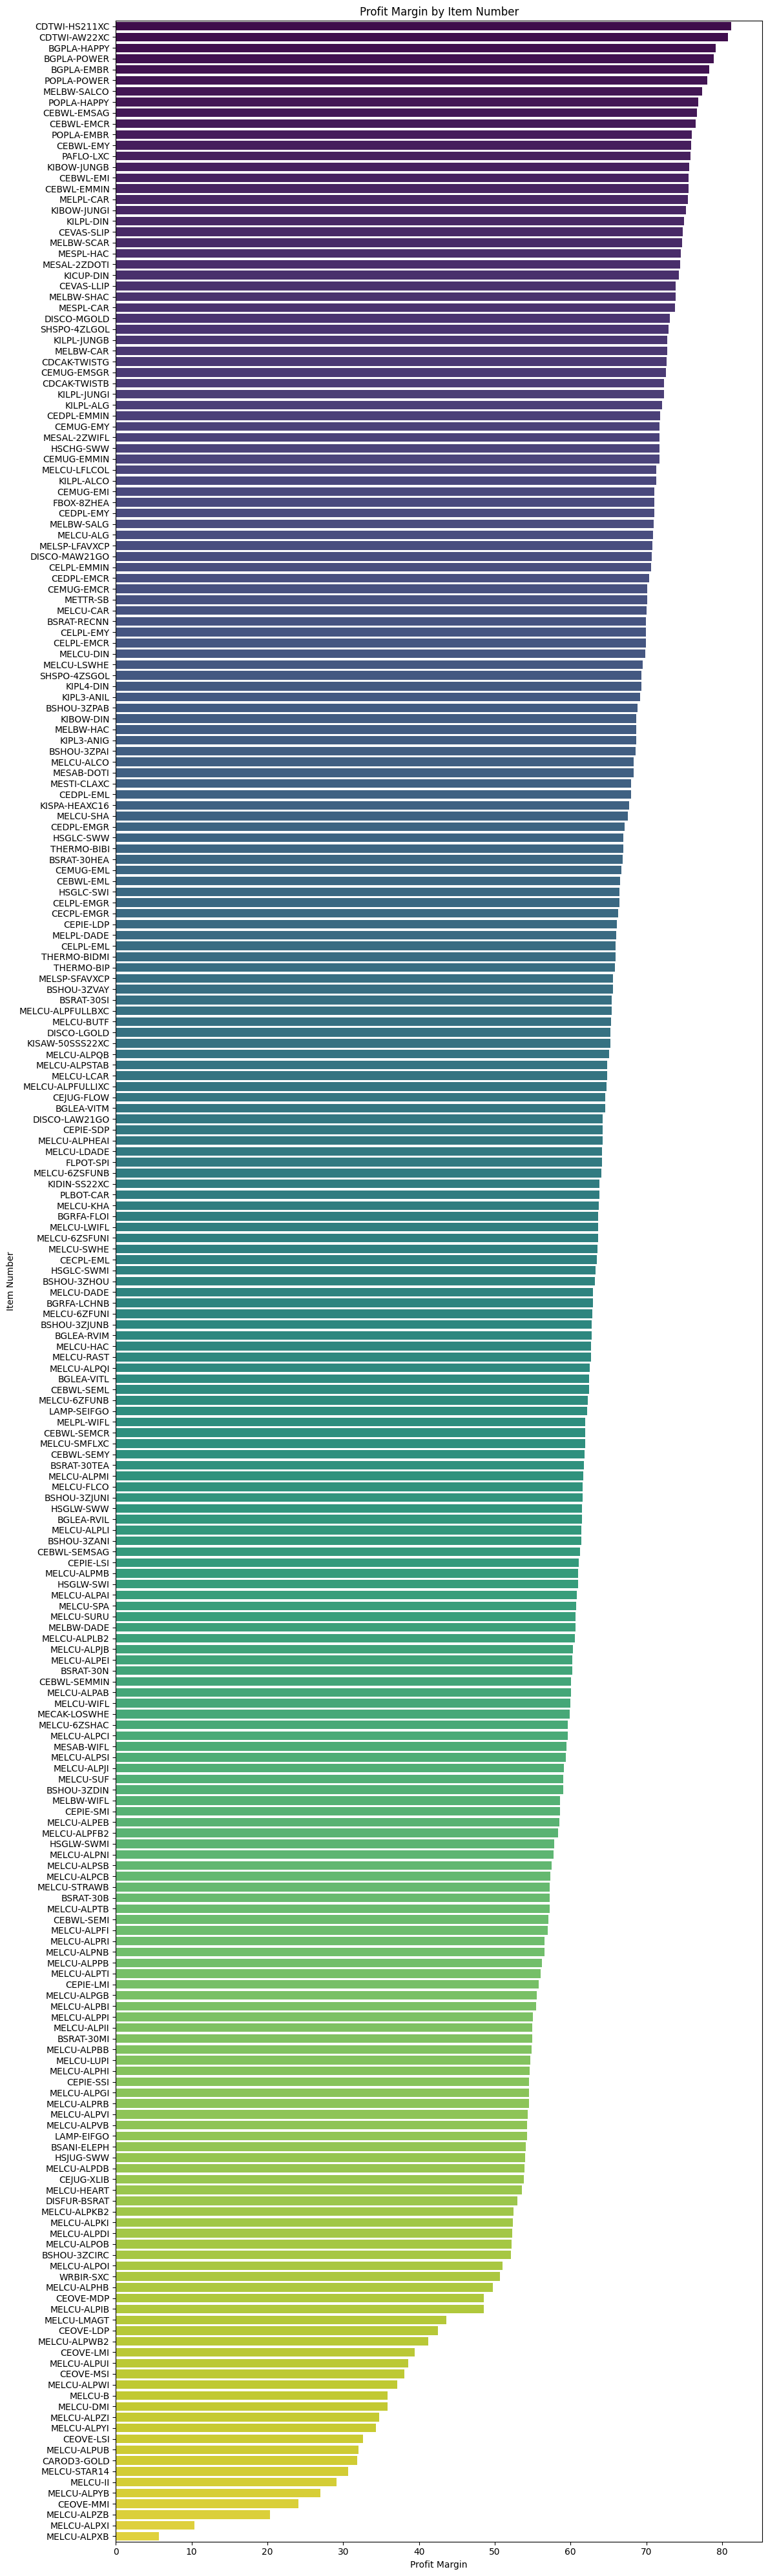

In [ ]:
profit_data = final_data[['_ItemNumber', 'profit_margin']]
sorted_profit_data = profit_data.sort_values(by='profit_margin', ascending=False)

plt.figure(figsize=(12, 40))  # Adjust the plot size to better fit the large number of categories
ax = sns.barplot(x='profit_margin', y='_ItemNumber', data=sorted_profit_data, orient='h', palette='viridis')
ax.set_xlabel('Profit Margin')
ax.set_ylabel('Item Number')
ax.set_title('Profit Margin by Item Number')
plt.tight_layout()
plt.show()


In [ ]:
# Calculate the total value for each item number by taking its average monthly sales times the profit margin 
final_data['total_value'] = final_data['average_monthly_sales'] * ((final_data['profit_margin']/100)+1)
total_value_all_items = final_data['total_value'].sum()
final_data['value_percentage'] = (final_data['total_value'] / total_value_all_items) * 100
sorted_data = final_data.sort_values(by='value_percentage', ascending=False)
sorted_data['cumulative_percentage'] = sorted_data['value_percentage'].cumsum()


<ipython-input-125-c4dcd319599f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-125-c4dcd319599f>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
def assign_category(cumulative_percentage):
    if cumulative_percentage <= 80:
        return 'A'
    elif cumulative_percentage <= 95:
        return 'B'
    else:
        return 'C'

sorted_data['ABC_category'] = sorted_data['cumulative_percentage'].apply(assign_category)


In [ ]:
# Calculate the total value for each item number by taking its average monthly sales times the profit margin 
final_data['total_value'] = final_data['average_monthly_sales'] * ((final_data['profit_margin']/100)+1)

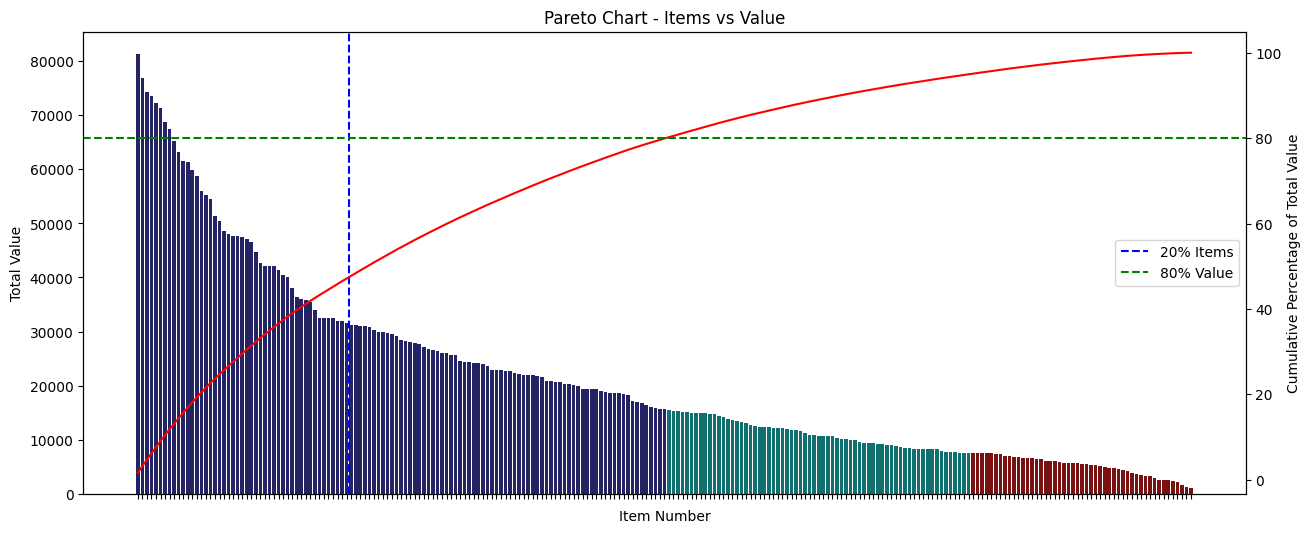

In [ ]:


# Sort the data by total_value in descending order
sorted_data = final_data.sort_values(by='total_value', ascending=False)

# Calculate the cumulative percentage of total value
total_value_all_items = sorted_data['total_value'].sum()
sorted_data['cumulative_percentage'] = (sorted_data['total_value'].cumsum() / total_value_all_items) * 100
sorted_data['ABC_category'] = sorted_data['cumulative_percentage'].apply(assign_category)

# Set the figure size
plt.figure(figsize=(15, 6))

# Bar plot for total value of each item
colors = {'A': 'midnightblue', 'B': 'teal', 'C': 'darkred'}
ax = sns.barplot(x='_ItemNumber', y='total_value', data=sorted_data, palette=sorted_data['ABC_category'].map(colors))

# Line plot for cumulative percentage of total value
ax2 = ax.twinx()
sns.lineplot(x=np.arange(len(sorted_data)), y='cumulative_percentage', data=sorted_data, color='r', ax=ax2)

# 80% value line
ax2.axhline(y=80, color='g', linestyle='--', label='80% Value')

# 20% items line
ax.axvline(x=len(sorted_data) * 0.2, color='b', linestyle='--', label='20% Items')

# Set axis labels and title
ax.set_xlabel('Items')
ax.set_ylabel('Total Value')
ax2.set_ylabel('Cumulative Percentage of Total Value')
ax.set_title('Pareto Chart - Items vs Value')

# Create the legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='center right')

# Remove x-axis tick labels
ax.xaxis.set_ticklabels([])

plt.show()

In [ ]:


fig = px.histogram(final_data, x="average_days_between_sales")

# Calculate tick step (dtick) and tick values
min_val, max_val = np.min(final_data['average_days_between_sales']), np.max(final_data['average_days_between_sales'])
dtick = (max_val - min_val) / 10  # Assuming we want 10 ticks on the x-axis
tickvals = np.arange(min_val, max_val + dtick, dtick)

# Update x-axis tick labels
fig.update_xaxes(
    tickmode='array',
    tickvals=tickvals,
    ticktext=[f'{int(tick_val)}-{int(tick_val+dtick)}' for tick_val in tickvals]
)

fig.show()
